# **Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra**

**Mounting the Google Drive where the data was saved, and loading said data, which is the galaxy spectra data from the
Sloan Digital Sky Survey (SDSS)**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive

In [ ]:
file_path = "/content/drive/My Drive/157CDATASET/"

In [ ]:
import numpy as np
data = np.load(file_path + 'spec4000_corrected.npz')

Checking the two arrays in the data: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [ ]:
data.files

['spec_recons', 'wavelength']

In [ ]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

**Let's plot the first few spectra to visualize our data**




In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

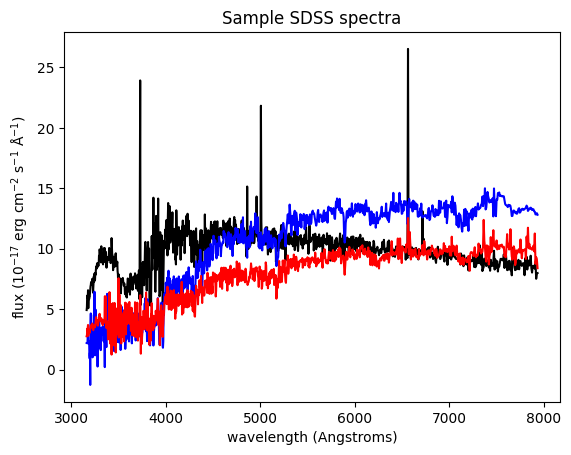

In [ ]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

**Plotting the mean spectrum by first normalizing the spectra, and then plotting the mean and standard deviation.**

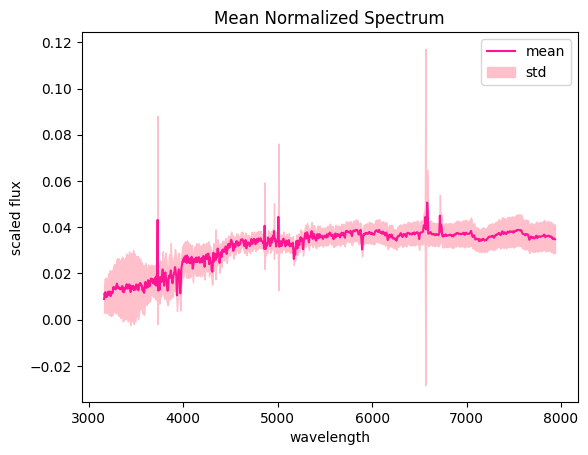

In [ ]:
from sklearn.preprocessing import normalize

# NORMALIZING THE SPECTRA
# COMPUTING FOR THE MEAN AND STD
normalized = normalize(data['spec_recons'])
mean = normalized.mean(0)
std = normalized.std(0)

# PLOTTING THE MEAN SPECTRUM
plt.plot(wavelength, mean, color="deeppink", label="mean")
plt.fill_between(wavelength, mean + std, mean - std, color="pink", label="std")
plt.xlabel("wavelength")
plt.ylabel("scaled flux")
plt.legend()
plt.title("Mean Normalized Spectrum")
plt.show()

As there are 4000 reconstructed SDSS spectra each with 1000 attributes, in order to visualize this large size of a dataset, we plot the mean spectrum of the normalized spectra. Some of our observations are as follows:


*   The wavelength in Angstroms of the dataset are greater than 3000, but less than 8000
*   There are notable wavelengths with the highest variation across the sample, particularly at around ~3800, ~5000, and ~6600 Angstroms.
*   The plot shows us that the mean flux varies greatly at peaks of these certain wavelengths, illustrating the activities in the galaxies found in the dataset. The spike ups should mean emission, while the downs should mean absorption.  
*   The credited scikit-learn tutorial tells us that one of the lines is specifically at 6563 Angstroms, which is the H-$α$ line.

**Performing Principal Component Analysis (PCA) and visualizing the top principal components:**

In [ ]:
from sklearn.decomposition import PCA

PCA = PCA(4)
PCA_spectra = PCA.fit_transform(normalized)

print(normalized.shape)
print(PCA_spectra.shape)

(4000, 1000)
(4000, 4)


From a 1000-dimension, we use PCA to get only the first 4 principal components that we need. PCA of sklearn uses linear dimensionality reduction using singular value decomposition of the data to keep the significant vectors to project to a lower dimensional space.

**To start, plotting the first two principal components with coefficient 1 in the x axis and coefficient 2 in the y axis**

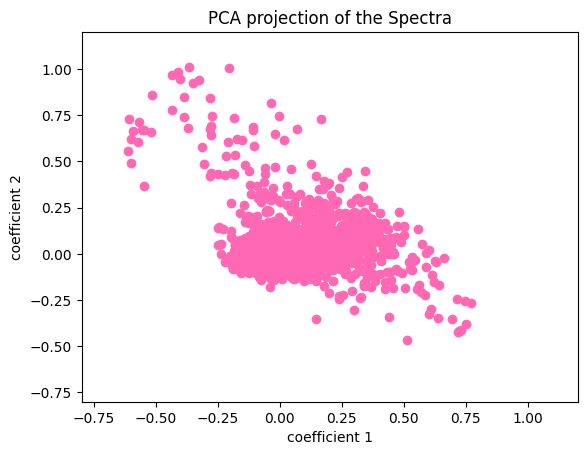

In [ ]:
plt.scatter(PCA_spectra[:, 0], PCA_spectra[:, 1], color="hotpink")
plt.xlim([-0.8, 1.2])
plt.ylim([-0.8, 1.2])
plt.xlabel("coefficient 1")
plt.ylabel("coefficient 2")
plt.title("PCA projection of the Spectra")
plt.show()

In plotting the first two principal components as coefficient 1 (as x) and coefficient 2 (as y), we use indexing, hence the use of ``` PCA_spectra[:, 0], PCA_spectra[:, 1]``` respectively. Then we just plot it as a normal scatter plot in order to visualize the top principal components.

**Plotting the first 4 eigenvectors together with the mean spectrum.**

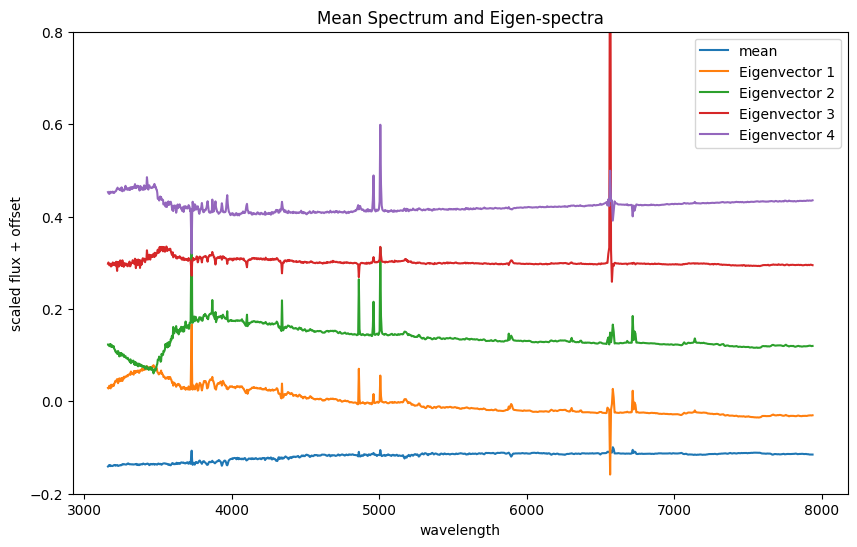

In [ ]:
plt.figure(figsize=([10,6]))
plt.plot(wavelength, mean - 0.15 , label="mean")
plt.plot(wavelength, PCA.components_[0] + 0, label = "Eigenvector 1")
plt.plot(wavelength, PCA.components_[1] + 0.15, label = "Eigenvector 2")
plt.plot(wavelength, PCA.components_[2] + 0.30, label = "Eigenvector 3")
plt.plot(wavelength, PCA.components_[3] + 0.45, label = "Eigenvector 4")

plt.ylim(-0.2,0.8)
plt.xlabel("wavelength")
plt.ylabel("scaled flux + offset")
plt.title("Mean Spectrum and Eigen-spectra")
plt.legend()
plt.show()

Now plotting the eigenvectors together with the spectrum with the use indexing. We can clearly see even from flux of the first 4 components that the notable wavelengths make sense and do probably persist all throughout the dataset. As Hydrogen is the most abundant element in the universe, so the lines, one way or another would show emission and/or absorption H lines in their spectra.  